In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# 輸入資料
traindata = pd.read_csv('train.csv')
testdata = pd.read_csv('test.csv')

In [77]:
# 觀察資料
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8098 entries, 0 to 8099
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       8098 non-null   int64  
 1   Administrative           8098 non-null   int64  
 2   Administrative_Duration  8098 non-null   float64
 3   Informational            8098 non-null   int64  
 4   Informational_Duration   8098 non-null   float64
 5   ProductRelated           8098 non-null   int64  
 6   ProductRelated_Duration  8098 non-null   float64
 7   BounceRates              8098 non-null   float64
 8   ExitRates                8098 non-null   float64
 9   PageValues               8098 non-null   float64
 10  SpecialDay               8098 non-null   float64
 11  Month                    8098 non-null   int64  
 12  OperatingSystems         8098 non-null   float64
 13  Browser                  8098 non-null   float64
 14  Region                  

In [168]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       900 non-null    int64  
 1   Administrative           900 non-null    int64  
 2   Administrative_Duration  900 non-null    float64
 3   Informational            900 non-null    int64  
 4   Informational_Duration   900 non-null    float64
 5   ProductRelated           900 non-null    int64  
 6   ProductRelated_Duration  900 non-null    float64
 7   BounceRates              900 non-null    float64
 8   ExitRates                900 non-null    float64
 9   PageValues               900 non-null    float64
 10  SpecialDay               900 non-null    float64
 11  Month                    900 non-null    int64  
 12  OperatingSystems         900 non-null    int64  
 13  Browser                  900 non-null    int64  
 14  Region                   9

In [54]:
# 填補空值
traindata = traindata.fillna(0)

In [60]:
# 發現weekend裡面有個100的離群值
index = traindata.loc[traindata['Weekend'] == 100].index
traindata = traindata.drop(index=index)

In [76]:
# 發現month裡面有個13的離群值
index = traindata.loc[traindata['Month'] == 13].index
traindata = traindata.drop(index=index)

C:\Users\s1111\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Revenue', ylabel='count'>

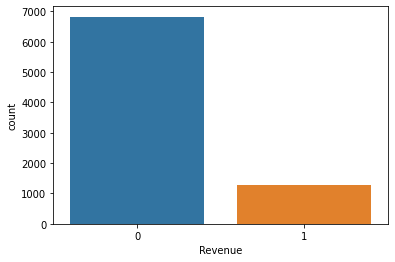

In [59]:
# 利用圖片來看訂房跟沒訂房的差距
sns.countplot(traindata['Revenue'])

In [79]:
# 使用相關係數看看有沒有線性的關係
# 看起來沒有相關性特別高的
corr_matrix = traindata.corr()
Corr = corr_matrix.loc['Revenue',:].sort_values()[:-1]
Corr = pd.DataFrame({ 'Revenue':Corr })
Corr

,Revenue
ExitRates,-0.207855
VisitorType,-0.111044
TrafficType,-0.088046
SpecialDay,-0.076457
OperatingSystems,-0.070954
BounceRates,-0.050095
Browser,-0.018815
Region,-0.010457
ProductRelated_Duration,-0.005531
ID,-0.001527


C:\Users\s1111\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekend', ylabel='count'>

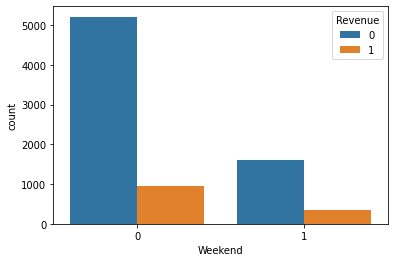

In [64]:
# 觀察每個參數的分布
sns.countplot(traindata['Weekend'], hue = traindata['Revenue'])

C:\Users\s1111\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VisitorType', ylabel='count'>

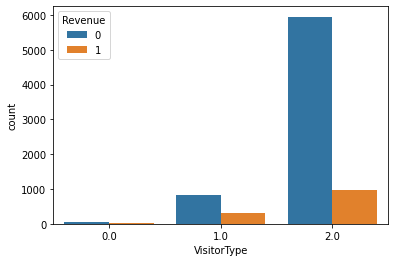

In [66]:
# 觀察每個參數的分布
sns.countplot(traindata['VisitorType'], hue = traindata['Revenue'])

C:\Users\s1111\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TrafficType', ylabel='count'>

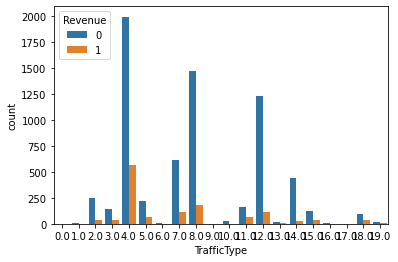

In [68]:
# 觀察每個參數的分布
sns.countplot(traindata['TrafficType'], hue = traindata['Revenue'])

C:\Users\s1111\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='count'>

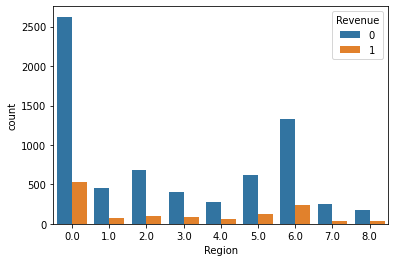

In [69]:
# 觀察每個參數的分布
sns.countplot(traindata['Region'], hue = traindata['Revenue'])

C:\Users\s1111\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Browser', ylabel='count'>

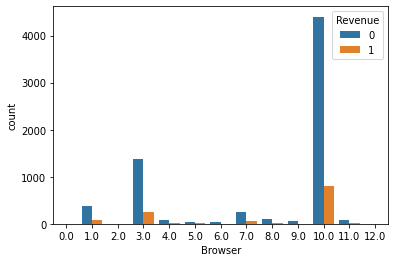

In [70]:
# 觀察每個參數的分布
sns.countplot(traindata['Browser'], hue = traindata['Revenue'])

C:\Users\s1111\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OperatingSystems', ylabel='count'>

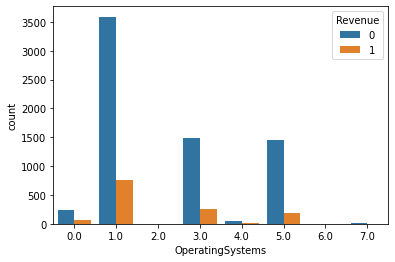

In [73]:
# 觀察每個參數的分布
sns.countplot(traindata['OperatingSystems'], hue = traindata['Revenue'])

C:\Users\s1111\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SpecialDay', ylabel='count'>

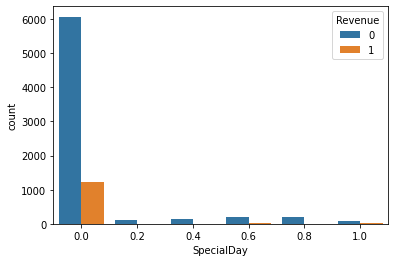

In [74]:
# 觀察每個參數的分布
sns.countplot(traindata['SpecialDay'], hue = traindata['Revenue'])

C:\Users\s1111\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

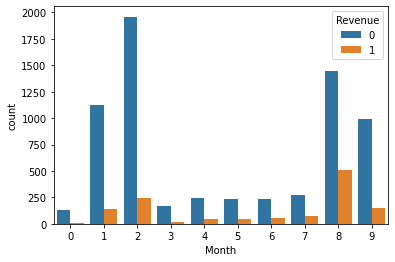

In [78]:
# 觀察每個參數的分布，但這幾個都沒有特別突出的資訊，訂房的人數多不訂房的人數也會多
sns.countplot(traindata['Month'], hue = traindata['Revenue'])

In [108]:
# 標準化某幾項特徵
from sklearn import preprocessing
traindata['Administrative_Duration'] = preprocessing.scale(traindata['Administrative_Duration'])
traindata['Informational_Duration'] = preprocessing.scale(traindata['Informational_Duration'])
traindata['ProductRelated_Duration'] = preprocessing.scale(traindata['ProductRelated_Duration'])



In [101]:
traindata['Administrative_Duration']

0      -0.449352
1      -0.449352
2       1.221972
3      -0.375318
4      -0.449352
          ...   
8095   -0.449352
8096   -0.364953
8097   -0.449352
8098    0.571131
8099   -0.173112
Name: Administrative_Duration, Length: 8098, dtype: float64

In [169]:
# 分割測試資料與訓練資料
# 有試著刪除幾個我覺得看起來比較不重要的特徵但結果的準確率並沒改變
from sklearn.model_selection import train_test_split
# traindata_x = traindata.drop(labels=['ID','Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','Revenue'],axis=1)
traindata_x = traindata.drop(labels=['ID','Revenue'],axis=1)
traindata_y = traindata['Revenue']
X_train, X_test, y_train, y_test = train_test_split(traindata_x, traindata_y, test_size=0.2)

In [170]:
# 嘗試用了幾個不同模型
# 回歸看來不太適合，準確率很低
from sklearn.linear_model import LinearRegression
lm = LinearRegression() 
model = lm.fit(X_train, y_train) 
model.score(X_test,y_test)

0.24183079850448408

In [171]:
# 分類使用決策樹模型
from sklearn import tree
clf = tree.DecisionTreeClassifier()
model = clf.fit(X_train, y_train)
model.score(X_test,y_test)

0.8592592592592593

In [172]:
# 使用交叉驗證法
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
print(scores)
print(scores.mean())

[0.86419753 0.85339506 0.86574074 0.85339506 0.84876543 0.84722222
 0.84567901 0.83487654 0.86862442 0.87326121]
0.8555157230904269


In [165]:
# 預測新資料
test_pred = clf.predict(testdata)
Submit= pd.DataFrame(test_pred)
Submit

,0
0,0
1,0
2,1
3,0
4,0
...,...
895,0
896,1
897,0
898,0


In [167]:
Submit.to_csv('2.csv')